# BEST SUBSET SELECTION

In [163]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('ggplot')

In [164]:
data=pd.read_csv(r"D:\Users\sandilya_garimella\Documents\Sandilya\DataSets\Automobile_data.csv")

In [165]:
data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [166]:
data.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

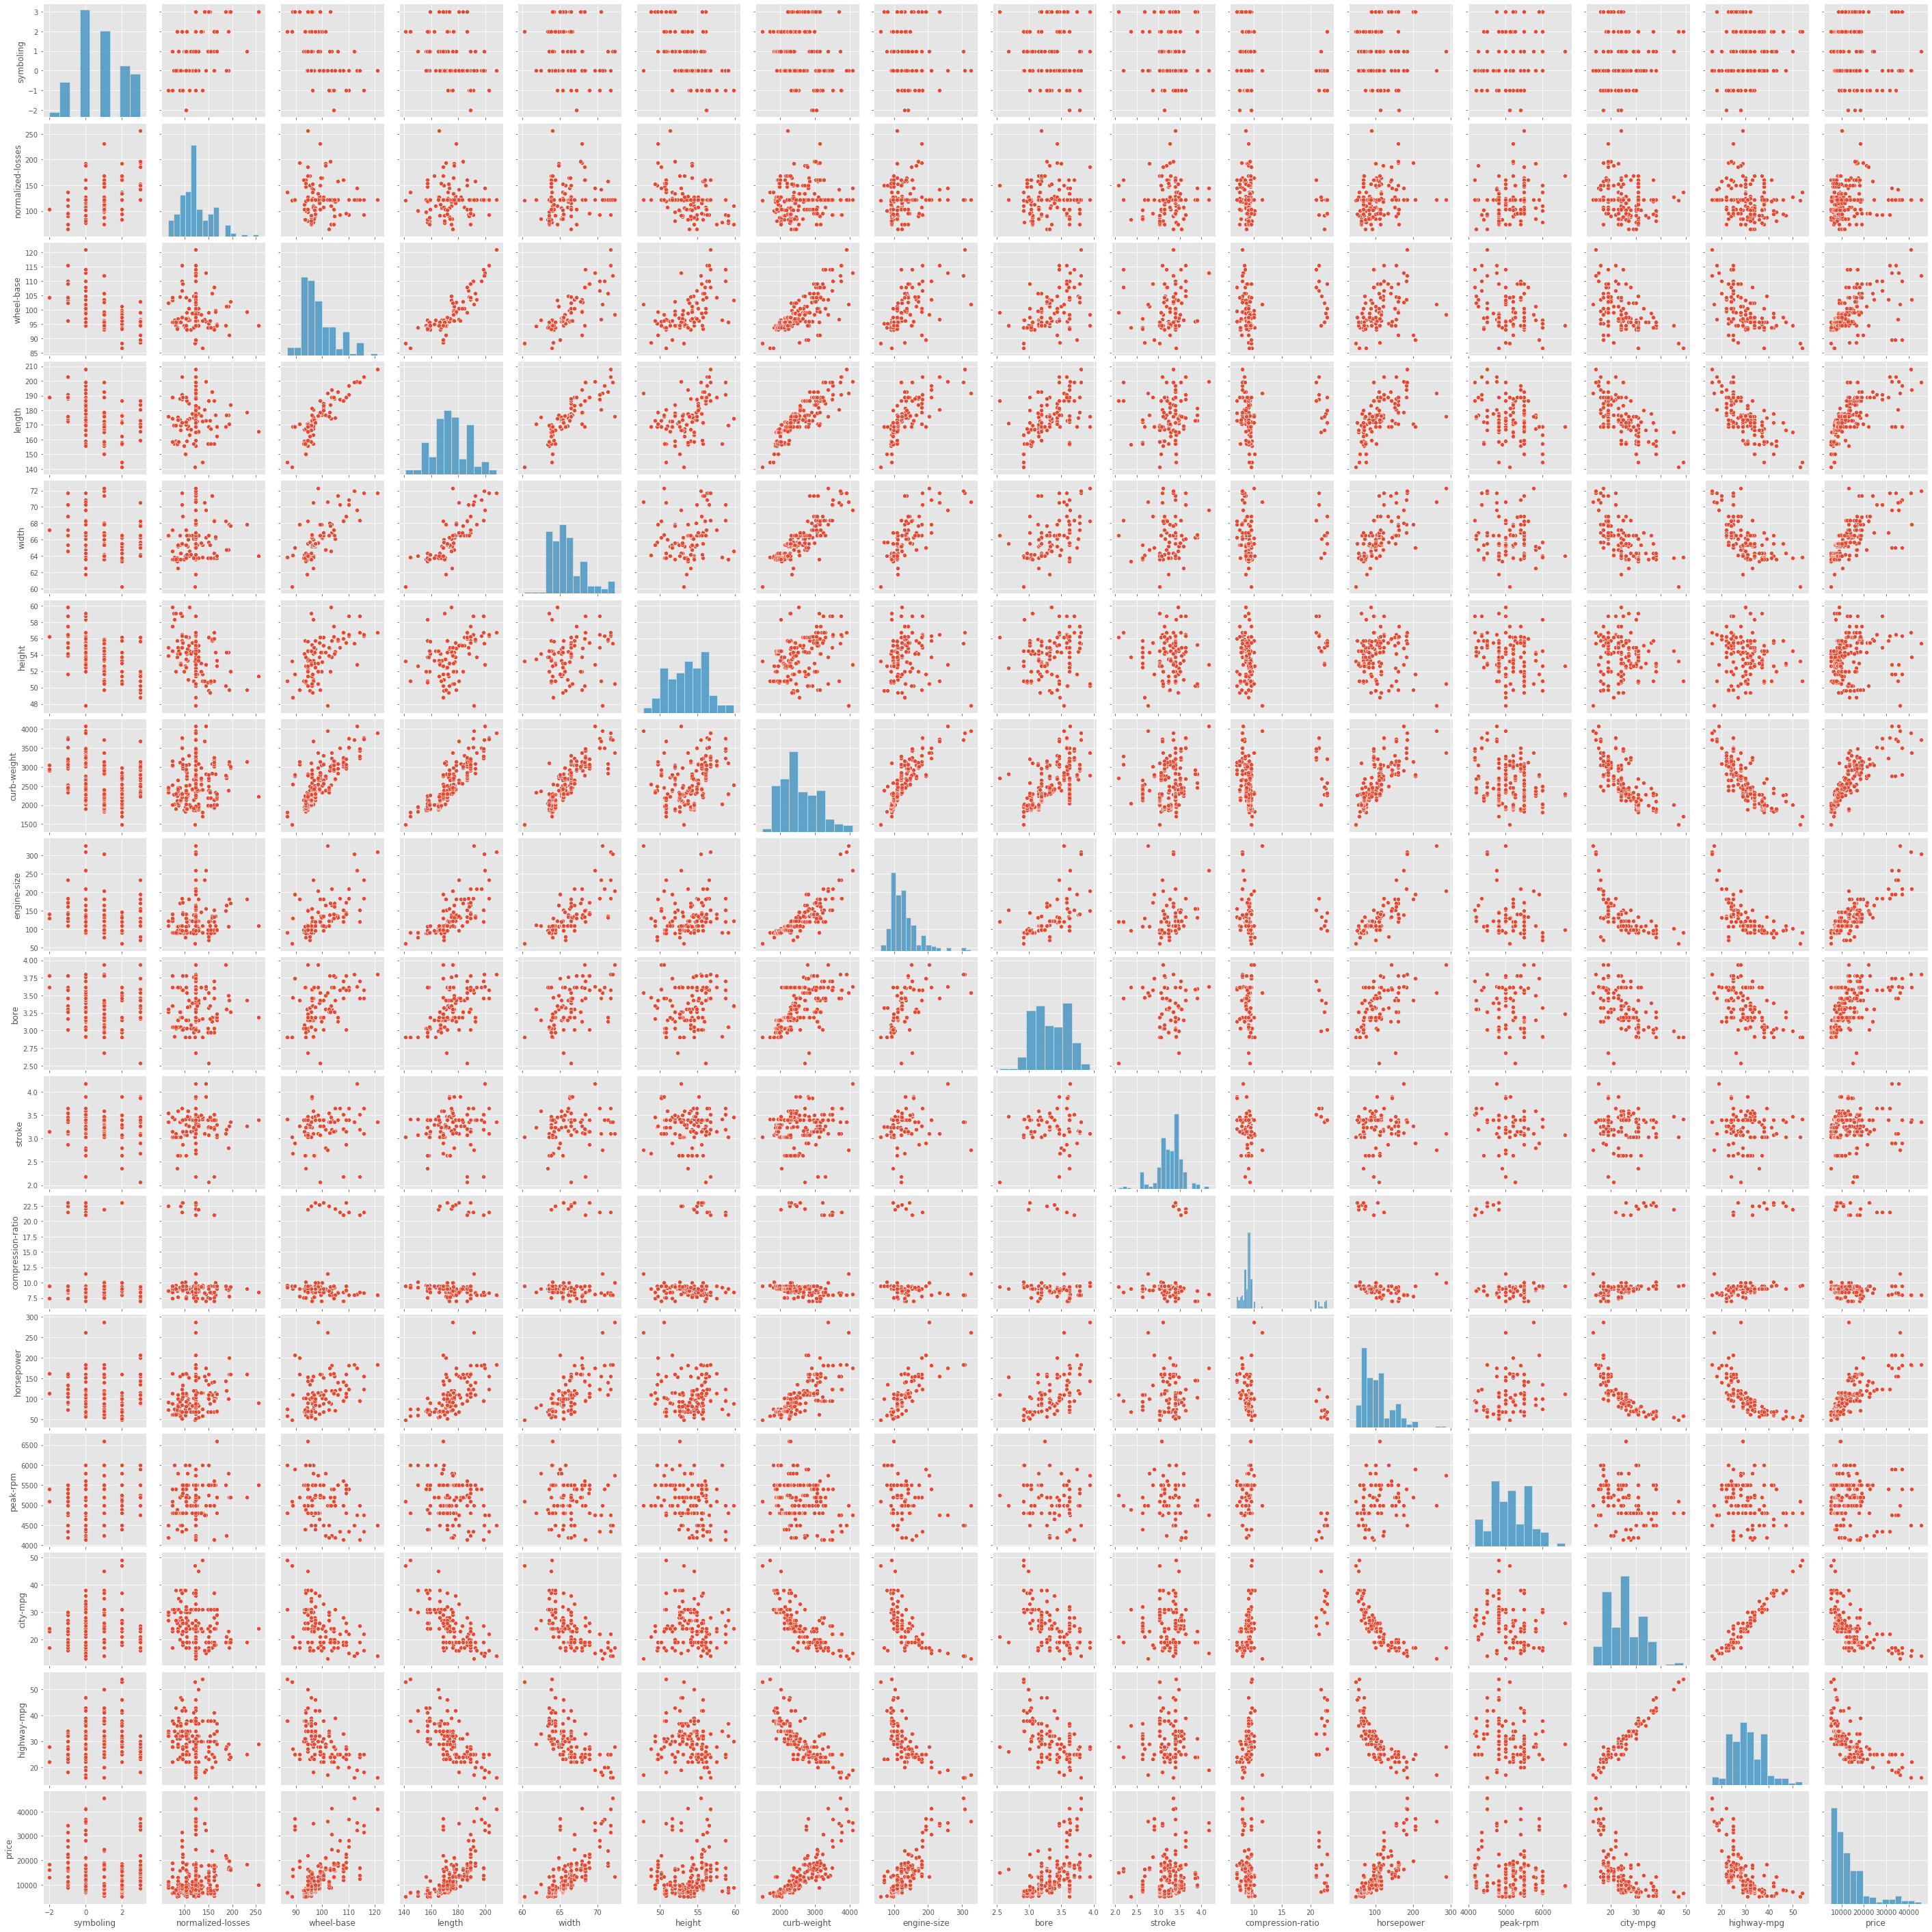

In [167]:
sns.pairplot(data)

In [168]:
#the scatter plot show a strong relationship between city mpg and highway mpg; 
#similarly in the case of curb-weigth so they were dropped
data1=data.drop(['highway-mpg', 'curb-weight'], axis=1)

In [181]:
df1=[ 'wheel-base', 'length', 'width',
       'height', 'curb-weight',  'city-mpg']
corr_data=data.loc[:,df1].corr()

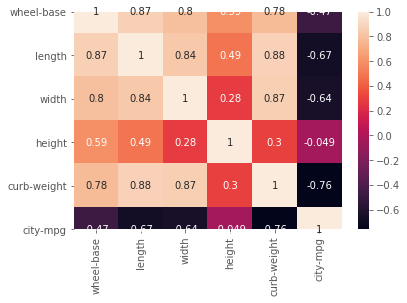

In [182]:
sns.heatmap(corr_data,annot=True)
plt.show()

In [171]:
data1.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'price'],
      dtype='object')

In [150]:
X = data1.iloc[:,:13]
Y = data1.iloc[:,13]

In [151]:
X

,symboling,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg
0,3,122,88.6,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,21
1,3,122,88.6,168.8,64.1,48.8,130,3.47,2.68,9.0,111,5000,21
2,1,122,94.5,171.2,65.5,52.4,152,2.68,3.47,9.0,154,5000,19
3,2,164,99.8,176.6,66.2,54.3,109,3.19,3.40,10.0,102,5500,24
4,2,164,99.4,176.6,66.4,54.3,136,3.19,3.40,8.0,115,5500,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,188.8,68.9,55.5,141,3.78,3.15,9.5,114,5400,23
201,-1,95,109.1,188.8,68.8,55.5,141,3.78,3.15,8.7,160,5300,19
202,-1,95,109.1,188.8,68.9,55.5,173,3.58,2.87,8.8,134,5500,18
203,-1,95,109.1,188.8,68.9,55.5,145,3.01,3.40,23.0,106,4800,26


In [152]:
Y

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int64

In [153]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [154]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook

#Initialization variables
k = 11
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

In [108]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))

,numb_features,RSS,R_squared,features
6,1,3.251050e+09,0.742617,"(engine-size,)"
56,2,3.003094e+09,0.762247,"(width, engine-size)"
276,3,2.803494e+09,0.778050,"(length, engine-size, peak-rpm)"


,numb_features,RSS,R_squared,features
6,1,3.251050e+09,0.742617,"(engine-size,)"
56,2,3.003094e+09,0.762247,"(width, engine-size)"
276,3,2.803494e+09,0.778050,"(length, engine-size, peak-rpm)"


In [109]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()

,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,1.254582e+10,0.006757,"(symboling,)",3.251050e+09,0.742617
1,1,1.240437e+10,0.017956,"(normalized-losses,)",3.251050e+09,0.742617
2,1,8.335498e+09,0.340085,"(wheel-base,)",3.251050e+09,0.742617
3,1,6.739103e+09,0.466471,"(length,)",3.251050e+09,0.742617
4,1,5.923998e+09,0.531002,"(width,)",3.251050e+09,0.742617


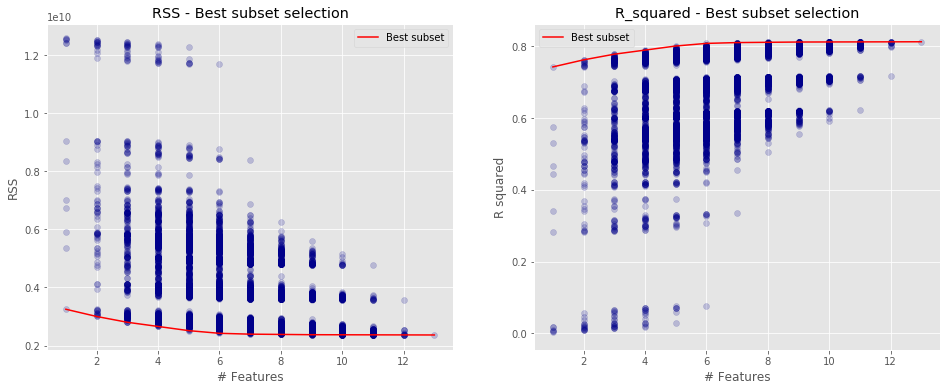

In [110]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()


In [111]:
#Initialization variables

k = 11

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [112]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,7)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['engine-size'], 3251050279.0),
 (2, ['engine-size', 'width'], 3003094377.0),
 (3, ['engine-size', 'width', 'peak-rpm'], 2814694789.0),
 (4, ['engine-size', 'width', 'peak-rpm', 'stroke'], 2686988826.0),
 (5,
  ['engine-size', 'width', 'peak-rpm', 'stroke', 'compression-ratio'],
  2570966219.0),
 (6,
  ['engine-size',
   'width',
   'peak-rpm',
   'stroke',
   'compression-ratio',
   'city-mpg'],
  2463138706.0)]

In [113]:
def processSubset(feature_set):
# Fit model on feature_set and calculate RSS
    model = sm.ols(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [114]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [115]:
#Initializing useful variables
m = len(Y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[engine-size],3.251050e+09,0.742617,1,1.597855e+07,1.301614,1.317824,0.741349
2,"[engine-size, width]",3.003094e+09,0.762247,2,1.488877e+07,1.212841,1.245260,0.759893
3,"[engine-size, width, peak-rpm]",2.814695e+09,0.777163,3,1.408951e+07,1.147733,1.196363,0.773837
4,"[engine-size, width, peak-rpm, stroke]",2.686989e+09,0.787273,4,1.358632e+07,1.106743,1.171582,0.783019
5,"[engine-size, width, peak-rpm, stroke, compres...",2.570966e+09,0.796459,5,1.314013e+07,1.070396,1.151445,0.791345
6,"[engine-size, width, peak-rpm, stroke, compres...",2.463139e+09,0.804995,6,1.273390e+07,1.037305,1.134564,0.799086
7,"[engine-size, width, peak-rpm, stroke, compres...",2.420109e+09,0.808402,7,1.264377e+07,1.029962,1.143431,0.801594
8,"[engine-size, width, peak-rpm, stroke, compres...",2.393576e+09,0.810502,8,1.263411e+07,1.029175,1.158854,0.802768
9,"[engine-size, width, peak-rpm, stroke, compres...",2.382359e+09,0.811390,9,1.269915e+07,1.034474,1.180362,0.802685
10,"[engine-size, width, peak-rpm, stroke, compres...",2.372967e+09,0.812134,10,1.277310e+07,1.040498,1.202596,0.802450


In [116]:
df1['R_squared_adj'].idxmax()
df1['R_squared_adj'].max()

0.8027678422660787

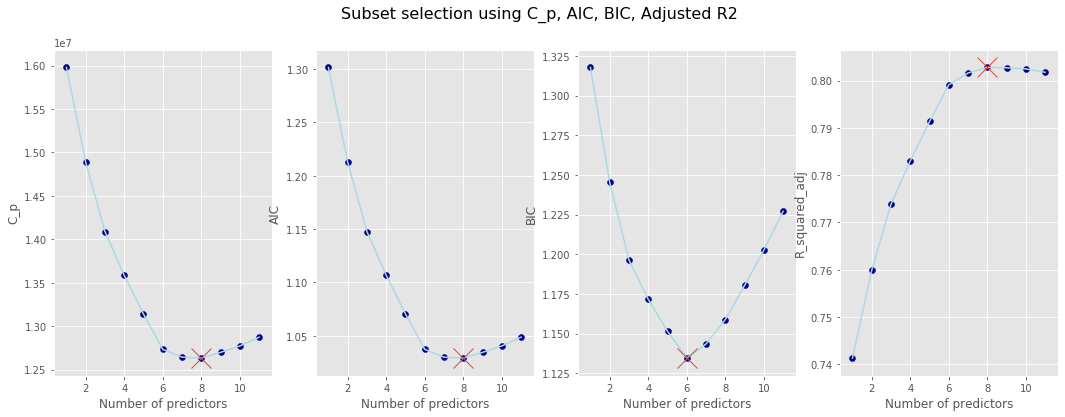

In [117]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

In [118]:
display([(features_list[7])])

[['engine-size',
  'width',
  'peak-rpm',
  'stroke',
  'compression-ratio',
  'city-mpg',
  'wheel-base']]

In [119]:
data2=data.drop(['normalized-losses', 'length', 'height','curb-weight', 'bore', 'horsepower', 'highway-mpg',],axis=1)

In [120]:
data2.head()

,symboling,wheel-base,width,engine-size,stroke,compression-ratio,peak-rpm,city-mpg,price
0,3,88.6,64.1,130,2.68,9.0,5000,21,13495
1,3,88.6,64.1,130,2.68,9.0,5000,21,16500
2,1,94.5,65.5,152,3.47,9.0,5000,19,16500
3,2,99.8,66.2,109,3.40,10.0,5500,24,13950
4,2,99.4,66.4,136,3.40,8.0,5500,18,17450


In [121]:
Xf = data2.iloc[:,:8]
Yf = data2.iloc[:,8]

In [122]:
modelf = smf.ols('Yf ~ Xf', data=data2)
modelf = modelf.fit()

In [123]:
modelf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Yf   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     104.8
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           1.43e-66
Time:                        20:39:29   Log-Likelihood:                -1958.9
No. Observations:                 205   AIC:                             3936.
Df Residuals:                     196   BIC:                             3966.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.385e+04   1.44e+04     -2.344      0.020   -6.23e+04   -5375.698
Xf[0]        383.6267    260.265      1.474      0.142    -129.653     896.907
Xf[1]        207.9022     87.218      2.384      0.018      35.897     379.907
Xf[2]         72.1814    252.340      0.286      0.775    -425.468     569.831
Xf[3]        139.6114      9.808     14.234      0.000     120.268     158.955
Xf[4]      -3011.9072    817.643     -3.684      0.000   -4624.414   -1399.400
Xf[5]        309.4341     81.914      3.778      0.000     147.888     470.980
Xf[6]          2.8051      0.635      4.417      0.000       1.553       4.058
Xf[7]       -157.8325     67.749     -2.330      0.021    -291.443     -24.222
==============================================================================
Omnibus:                       23.569   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.017
Skew:                           0.314   Prob(JB):                     3.46e-19
Kurtosis:                       6.092   Cond. No.                     3.05e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

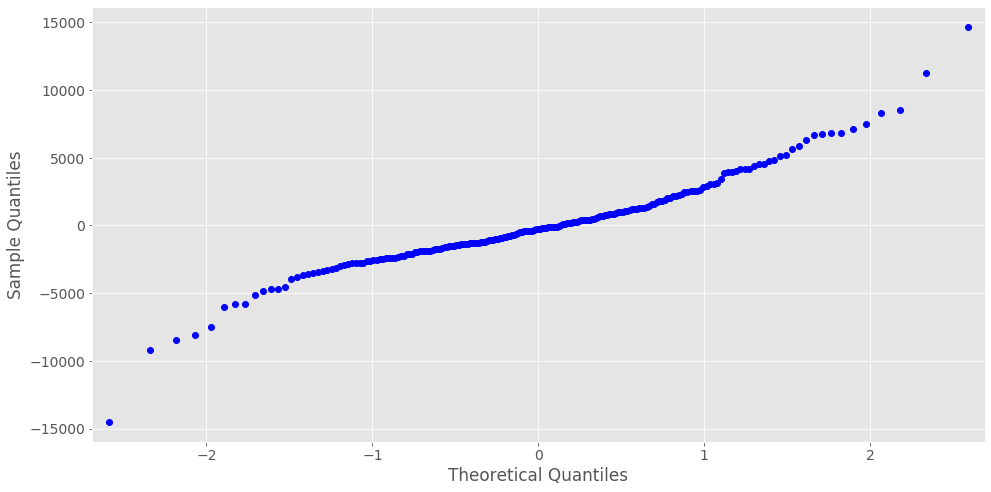

In [162]:
pred_val = modelf.fittedvalues.copy()
residual = Y - pred_val
probplot = sm.ProbPlot(residual)
fig = probplot.qqplot()

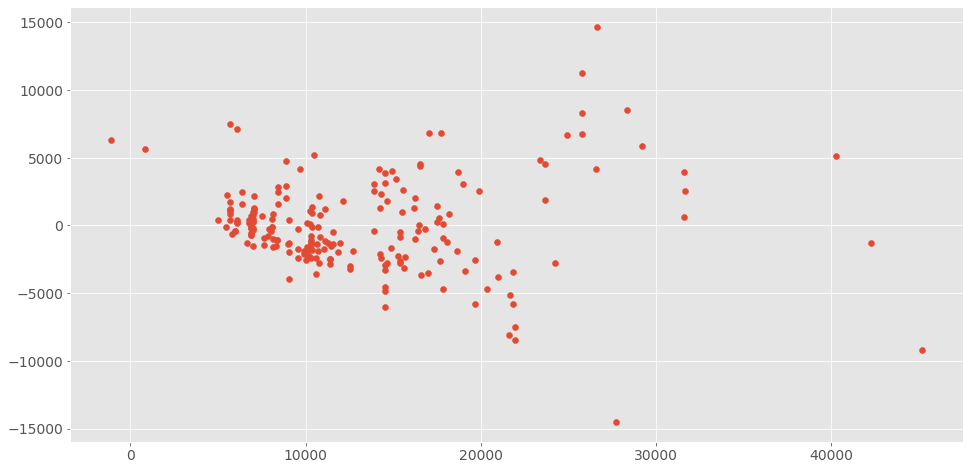

In [161]:
## Residual plot
plt.scatter(pred_val, residual)

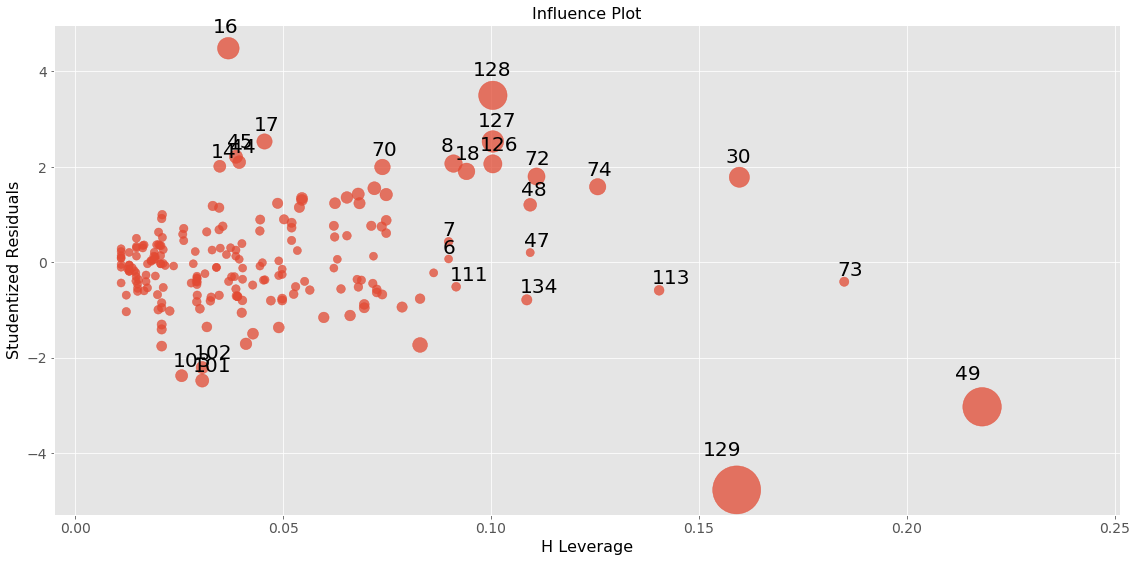

In [160]:

fig = sm.graphics.influence_plot(modelf, criterion="cooks")
fig.tight_layout(pad=1.0)

In [127]:
 from sklearn import linear_model
reg = linear_model.LinearRegression()

In [138]:
X_train = Xf[:-20]
X_test = Xf[-20:]

In [139]:
Y_train = Yf[:-20]
Y_test = Yf[-20:]

In [140]:
Y_test

185     8195
186     8495
187     9495
188     9995
189    11595
190     9980
191    13295
192    13845
193    12290
194    12940
195    13415
196    15985
197    16515
198    18420
199    18950
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, dtype: int64

In [141]:
reg.fit(X_train,Y_train)

LinearRegression()

In [142]:
Y_pred = reg.predict(X_test)


In [143]:
Y_pred

array([10189.01000564, 10189.01000564,  8732.96602671, 11336.06372215,
       10959.15853401, 10952.07578996, 15561.41582717,  9096.01646535,
       11038.53606149, 16486.0226885 , 16942.39508333, 16356.36878729,
       16812.74118212, 14244.72097426, 14701.09336908, 18098.23776018,
       18097.70550861, 24308.86761563, 19397.97223825, 18616.85336502])

In [144]:
 reg.coef_

array([ 4.56372395e+02,  2.28258198e+02,  3.54137202e+01,  1.43732021e+02,
       -3.05269214e+03,  2.71616396e+02,  2.98313368e+00, -1.29653901e+02])

In [145]:
#calculating mean square error
print( mean_squared_error(Y_test, Y_pred))

6825204.031696047


In [146]:
#calculating cofficeint of determination
print(r2_score(Y_test, Y_pred))

0.6626129427892422
